In [255]:
#import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime

from pandas import Series
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import statsmodels.api as sm

In [256]:
import sqlite3
import pandas as pd

connection = sqlite3.connect("database.db")
cursor = connection.cursor()
query = "SELECT * FROM Data"
cursor.execute(query)
result = cursor.fetchall()
for item in result:
    print(item)
df = pd.read_sql_query(query,connection)
df
df.to_csv('data.csv')


cursor.close()

(1, 'Raflesia speciosa (Panay Rafflesia)', '2016-01-04', 'Sibalom, Antique', 'Brgy. Imparayan', 15, 'Seen', 'Loss of Habitat', 'Seen at BMS site', 'Bantay Gubat', 10.78731, 122.104682)
(2, 'Aceros waldeni (Visayan Writhed Hornbill)', '2016-01-11', 'Sibalom, Antique', 'Sitio Igculibao, Brgy.  Cabladan', 17, 'Seen', 'Hunting', 'Seen at BMS site', 'IP leaders', 10.802552, 122.143548)
(3, 'Aceros waldeni (Visayan Writhed Hornbill)', '2016-01-12', 'Madalag, Aklan', 'Brgy. Maria Cristina', 10, 'Heard & Seen', 'Loss of Habitat', 'Seen at the forest edges', 'Cenro Staff', 11.526426, 122.309037)
(4, 'Aceros waldeni (Visayan Writhed Hornbill)', '2016-01-18', 'Ibajay, Aklan', 'Brgy. Capataga', 17, 'Heard & Seen', 'Loss of Habitat', 'Seen at BMS site', 'IP leaders', 11.815656, 122.170886)
(5, 'Sus cebifrons (Visayan Warty Pig)', '2016-01-25', 'Malinao, Aklan', 'Brgy. Aparicio', 13, 'Heard & Seen', 'Loss of Habitat', 'Seen in the area of Aparicio', 'Bantay Gubat', 11.644341, 122.305898)
(6, 'Aceros

In [257]:
data = pd.read_csv('data.csv')
df = data[data['species_name'] == "Sus cebifrons (Visayan Warty Pig)"]
df=df[['date_report','no_observation']]
df['date_report']=pd.to_datetime(df['date_report'])

In [258]:
df.columns

Index(['date_report', 'no_observation'], dtype='object')

In [259]:
df


,date_report,no_observation
4,2016-01-25,13
7,2016-01-25,12
12,2016-02-22,13
15,2016-02-22,15
20,2016-03-21,13
...,...,...
541,2021-10-19,9
544,2021-11-24,5
547,2021-11-25,8
550,2021-12-21,7


In [260]:
### Rename the columns
new_df = df.reset_index().rename(columns={'date_report':'date', 'no_observation' : 'Popu'})

### Remove the header row
new_df = new_df.iloc[1:len(new_df)]

new_df

,index,date,Popu
1,7,2016-01-25,12
2,12,2016-02-22,13
3,15,2016-02-22,15
4,20,2016-03-21,13
5,23,2016-03-21,11
...,...,...,...
138,541,2021-10-19,9
139,544,2021-11-24,5
140,547,2021-11-25,8
141,550,2021-12-21,7


In [261]:
new_df['year']=new_df.date.dt.year
new_df['month']=new_df.date.dt.month
new_df['day']=new_df.date.dt.day

In [262]:
new_df

,index,date,Popu,year,month,day
1,7,2016-01-25,12,2016,1,25
2,12,2016-02-22,13,2016,2,22
3,15,2016-02-22,15,2016,2,22
4,20,2016-03-21,13,2016,3,21
5,23,2016-03-21,11,2016,3,21
...,...,...,...,...,...,...
138,541,2021-10-19,9,2021,10,19
139,544,2021-11-24,5,2021,11,24
140,547,2021-11-25,8,2021,11,25
141,550,2021-12-21,7,2021,12,21


In [263]:
new_df.index = new_df.date
new_df

,index,date,Popu,year,month,day
date,,,,,,
2016-01-25,7,2016-01-25,12,2016,1,25
2016-02-22,12,2016-02-22,13,2016,2,22
2016-02-22,15,2016-02-22,15,2016,2,22
2016-03-21,20,2016-03-21,13,2016,3,21
2016-03-21,23,2016-03-21,11,2016,3,21
...,...,...,...,...,...,...
2021-10-19,541,2021-10-19,9,2021,10,19
2021-11-24,544,2021-11-24,5,2021,11,24
2021-11-25,547,2021-11-25,8,2021,11,25


<AxesSubplot:xlabel='month'>

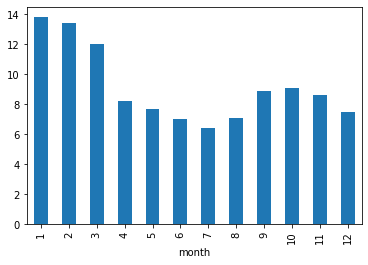

In [264]:
new_df.groupby('month').Popu.mean().plot.bar()

<AxesSubplot:xlabel='year'>

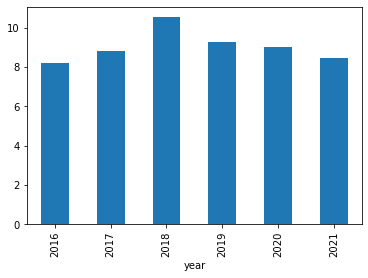

In [265]:
new_df.groupby('year').Popu.mean().plot.bar()

In [266]:
new_df

,index,date,Popu,year,month,day
date,,,,,,
2016-01-25,7,2016-01-25,12,2016,1,25
2016-02-22,12,2016-02-22,13,2016,2,22
2016-02-22,15,2016-02-22,15,2016,2,22
2016-03-21,20,2016-03-21,13,2016,3,21
2016-03-21,23,2016-03-21,11,2016,3,21
...,...,...,...,...,...,...
2021-10-19,541,2021-10-19,9,2021,10,19
2021-11-24,544,2021-11-24,5,2021,11,24
2021-11-25,547,2021-11-25,8,2021,11,25


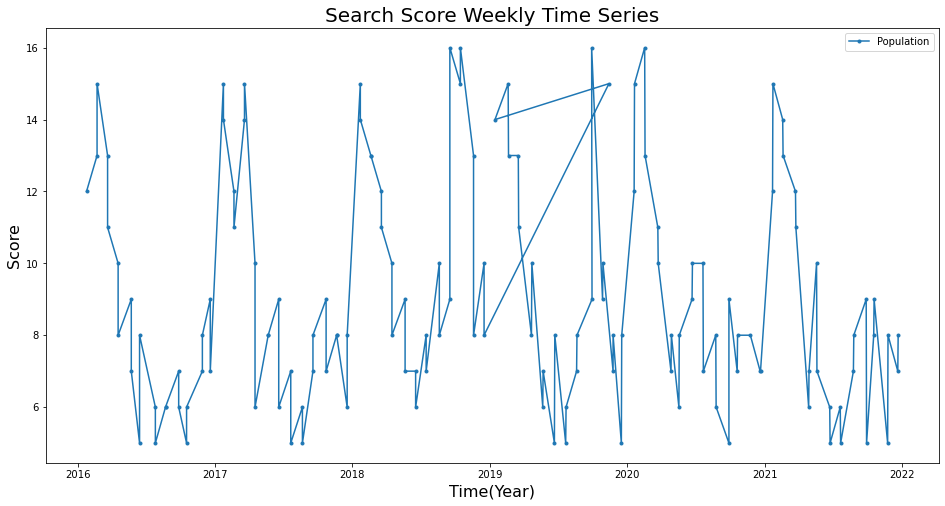

In [267]:
plt.figure(figsize=(16,8))

plt.plot(new_df['Popu'], ".-", label = 'Population')

plt.title('Search Score Weekly Time Series', fontsize=20)
plt.xlabel("Time(Year)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc = 'best')

In [268]:
monthly = new_df.resample('M').sum()
monthly

,index,Popu,year,month,day
date,,,,,
2016-01-31,7,12,2016,1,25
2016-02-29,27,28,4032,4,44
2016-03-31,43,24,4032,6,42
2016-04-30,59,18,4032,8,36
2016-05-31,75,16,4032,10,46
...,...,...,...,...,...
2021-08-31,1053,15,4042,16,51
2021-09-30,1066,14,4042,18,57
2021-10-31,1079,17,4042,20,37


In [269]:
start_date = datetime(2017,2,28)
end_date = datetime(2021,12,31)

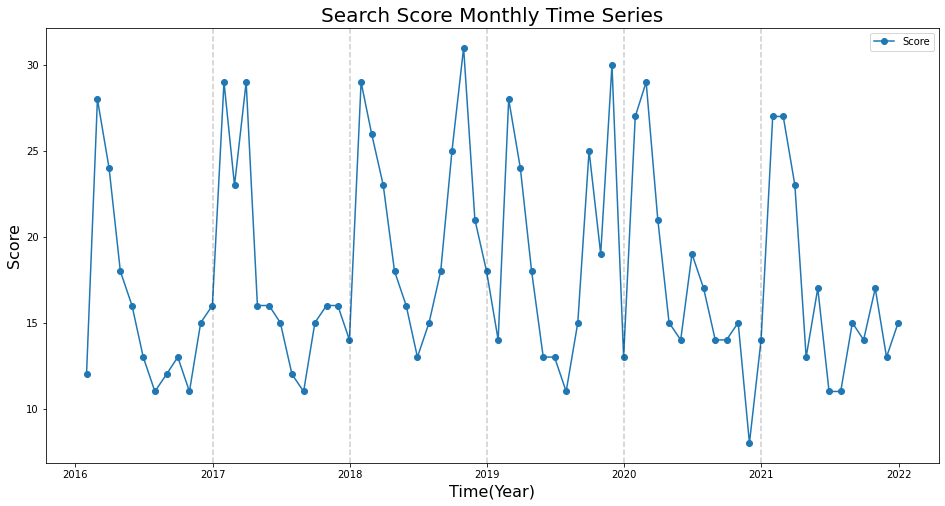

In [270]:
plt.figure(figsize=(16,8))

plt.plot(monthly['Popu'], "o-", label = 'Score')

plt.title('Search Score Monthly Time Series', fontsize=20)
plt.xlabel("Time(Year)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc = 'best')

for year in range(start_date.year,end_date.year+1):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [271]:
start_date = datetime(2017,1,1)
end_date = datetime(2021,12,31)

lim_data = monthly[start_date:end_date]
len(lim_data)

60

In [272]:
lim_data

,index,Popu,year,month,day
date,,,,,
2017-01-31,204,29,4034,2,46
2017-02-28,221,23,4034,4,40
2017-03-31,237,29,4034,6,40
2017-04-30,253,16,4034,8,34
2017-05-31,269,16,4034,10,44
2017-06-30,287,15,4034,12,38
2017-07-31,301,12,4034,14,42
2017-08-31,317,11,4034,16,42
2017-09-30,333,15,4034,18,36


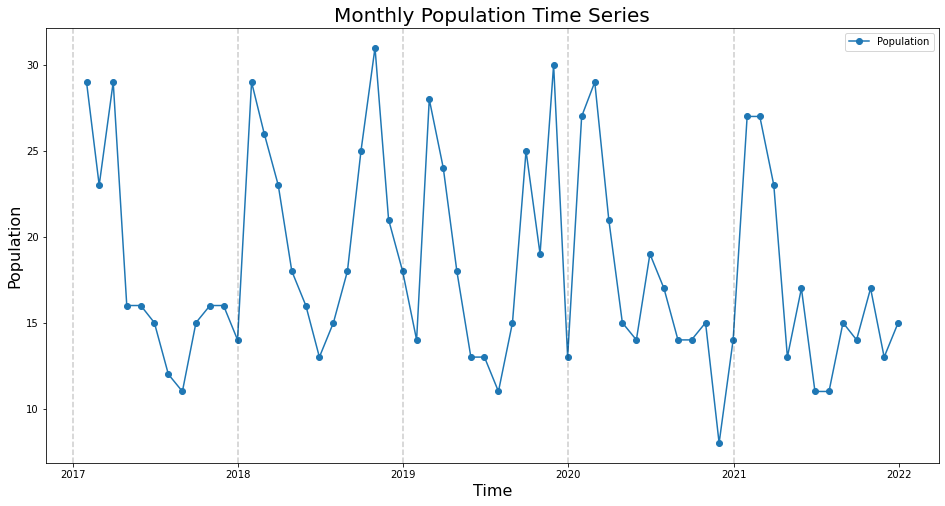

In [273]:
plt.figure(figsize=(16,8))

plt.plot(lim_data['Popu'], "o-", label = 'Population')

plt.title('Monthly Population Time Series', fontsize=20)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Population", fontsize=16)
plt.legend(loc = 'best')

for year in range(start_date.year,end_date.year+1):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [274]:
# DF Test using statsmodels adfuller
from statsmodels.tsa.stattools import adfuller

def df_test(time_series):
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(time_series, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    
    print (dfoutput)

In [275]:
df_test(lim_data.Popu)

Results of Dickey-Fuller Test:
Test Statistic                 -5.095821
p-value                         0.000014
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [276]:
print(list(lim_data.Popu))

[29, 23, 29, 16, 16, 15, 12, 11, 15, 16, 16, 14, 29, 26, 23, 18, 16, 13, 15, 18, 25, 31, 21, 18, 14, 28, 24, 18, 13, 13, 11, 15, 25, 19, 30, 13, 27, 29, 21, 15, 14, 19, 17, 14, 14, 15, 8, 14, 27, 27, 23, 13, 17, 11, 11, 15, 14, 17, 13, 15]


In [277]:
first_diff = lim_data.Popu.diff()[1:]

print(list(first_diff))

[-6.0, 6.0, -13.0, 0.0, -1.0, -3.0, -1.0, 4.0, 1.0, 0.0, -2.0, 15.0, -3.0, -3.0, -5.0, -2.0, -3.0, 2.0, 3.0, 7.0, 6.0, -10.0, -3.0, -4.0, 14.0, -4.0, -6.0, -5.0, 0.0, -2.0, 4.0, 10.0, -6.0, 11.0, -17.0, 14.0, 2.0, -8.0, -6.0, -1.0, 5.0, -2.0, -3.0, 0.0, 1.0, -7.0, 6.0, 13.0, 0.0, -4.0, -10.0, 4.0, -6.0, 0.0, 4.0, -1.0, 3.0, -4.0, 2.0]


No handles with labels found to put in legend.


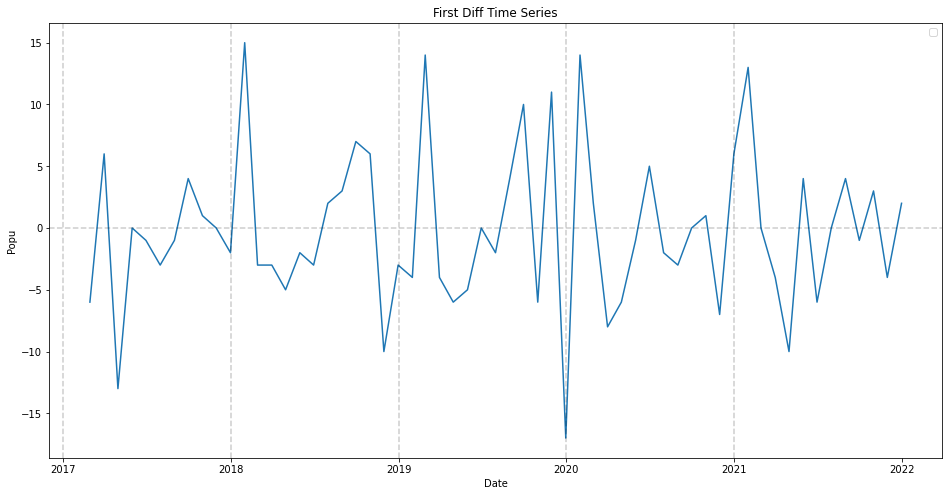

In [278]:
plt.figure(figsize=(16,8))

plt.plot(first_diff)

plt.title('First Diff Time Series')
plt.xlabel("Date")
plt.ylabel("Popu")
plt.legend(loc = 'best')

for year in range(start_date.year,end_date.year+1):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [279]:
df_test(first_diff)

Results of Dickey-Fuller Test:
Test Statistic                -5.677185e+00
p-value                        8.650692e-07
#Lags Used                     9.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (1%)           -3.571472e+00
Critical Value (5%)           -2.922629e+00
Critical Value (10%)          -2.599336e+00
dtype: float64


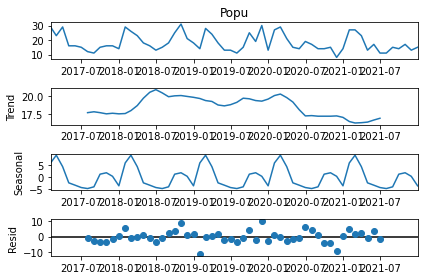

In [280]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(lim_data.Popu).plot()
plt.show()

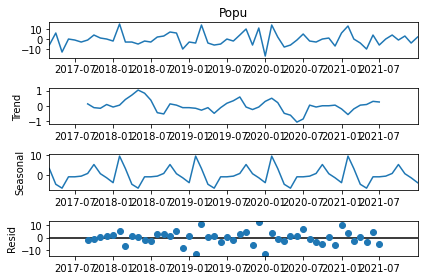

In [281]:
sm.tsa.seasonal_decompose(first_diff).plot()
plt.show()

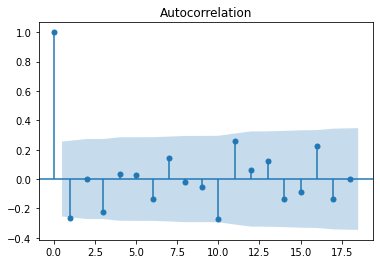

In [282]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(first_diff)

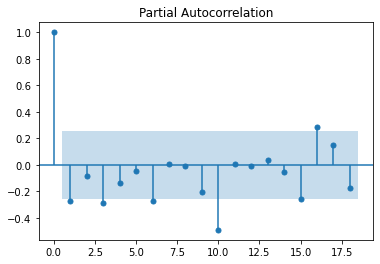

In [283]:
pacf_plot = plot_pacf(first_diff)

In [284]:
lim_data

,index,Popu,year,month,day
date,,,,,
2017-01-31,204,29,4034,2,46
2017-02-28,221,23,4034,4,40
2017-03-31,237,29,4034,6,40
2017-04-30,253,16,4034,8,34
2017-05-31,269,16,4034,10,44
2017-06-30,287,15,4034,12,38
2017-07-31,301,12,4034,14,42
2017-08-31,317,11,4034,16,42
2017-09-30,333,15,4034,18,36


In [285]:
from datetime import timedelta

train_end = datetime(2020,1,31)
test_end = datetime(2021,12,31)

train_data = lim_data[:train_end]
test_data = lim_data[train_end + timedelta(days=1):test_end]

In [286]:
train_data.tail(5)

,index,Popu,year,month,day
date,,,,,
2019-09-30,717,25,4038,18,59
2019-10-31,733,19,4038,20,57
2019-11-30,1042,30,6057,33,64
2019-12-31,765,13,4038,24,35
2020-01-31,781,27,4040,2,41


In [287]:
test_data

,index,Popu,year,month,day
date,,,,,
2020-02-29,797,29,4040,4,35
2020-03-31,813,21,4040,6,47
2020-04-30,829,15,4040,8,55
2020-05-31,845,14,4040,10,37
2020-06-30,861,19,4040,12,45
2020-07-31,877,17,4040,14,43
2020-08-31,893,14,4040,16,49
2020-09-30,909,14,4040,18,56
2020-10-31,925,15,4040,20,41


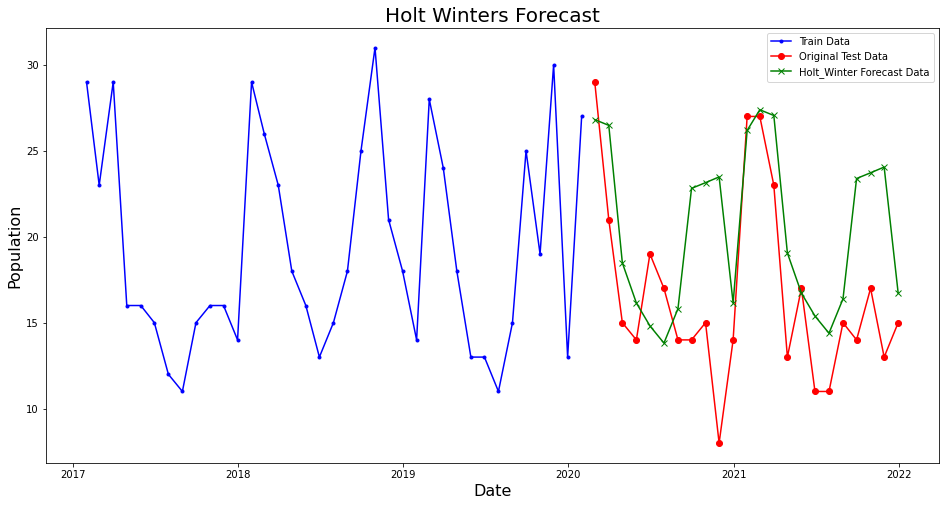

In [288]:
from statsmodels.tsa.api import ExponentialSmoothing


holt_winter = ExponentialSmoothing(np.asarray(train_data['Popu']), seasonal_periods=12, trend='add', seasonal='add')

hw_fit = holt_winter.fit()

hw_forecast = hw_fit.forecast(len(test_data))

plt.figure(figsize=(16,8))

plt.plot(train_data.index, train_data['Popu'], "b.-", label='Train Data')
plt.plot(test_data.index, test_data['Popu'], "ro-", label='Original Test Data')
plt.plot(test_data.index, hw_forecast, "gx-", label='Holt_Winter Forecast Data')
plt.ylabel('Population', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.legend(loc='best')
plt.title('Holt Winters Forecast', fontsize=20)
plt.show()

In [195]:
list(hw_forecast)

[28.545453760690854,
 23.21212791288942,
 29.54546563872656,
 29.212139203603837,
 29.212149998221488,
 27.212165373290304,
 31.545484897506046,
 32.212168431901425,
 39.87881489122366,
 44.21214755832581,
 41.87880286435862,
 33.96237896825965,
 24.5987411717026,
 19.265415323901166,
 25.598753049738306,
 25.26542661461558,
 25.26543740923323,
 23.265452784302045,
 27.598772308517795,
 28.265455842913177,
 35.93210230223541,
 40.265434969337555,
 37.93209027537037]

In [196]:
test_data['Popu']

date
2020-02-29    29
2020-03-31    27
2020-04-30    30
2020-05-31    30
2020-06-30    37
2020-07-31    33
2020-08-31    32
2020-09-30    32
2020-10-31    45
2020-11-30    46
2020-12-31    45
2021-01-31    26
2021-02-28    27
2021-03-31    25
2021-04-30    24
2021-05-31    27
2021-06-30    23
2021-07-31    27
2021-08-31    23
2021-09-30    29
2021-10-31    41
2021-11-30    49
2021-12-31    50
Freq: M, Name: Popu, dtype: int64

In [197]:
hw_residuals = test_data['Popu'] - hw_forecast

In [198]:
print('Mean Absolute Percent Error:', round(np.mean(abs(hw_residuals/test_data.Popu)),2))

Mean Absolute Percent Error: 0.11


In [199]:
print('Root Mean Squared Error:', np.sqrt(np.mean(hw_residuals**2)))

Root Mean Squared Error: 4.8675575750335875


In [200]:
from pmdarima import auto_arima

Sarimax_model = auto_arima(train_data.Popu,
                       start_p=0,
                       start_q=0,
                       max_p=3,
                       max_q=3,
                       m=12,
                       test='adf',
                       seasonal=True,
                       d=1,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

Sarimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=191.911, Time=0.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=188.443, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=187.193, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=187.037, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=185.999, Time=0.05 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=187.126, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=187.762, Time=0.05 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=186.951, Time=0.05 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=186.285, Time=0.03 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=188.269, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=187.755, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.867 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   37
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -91.000
Date:                             Sat, 27 Nov 2021   AIC                            185.999
Time:                                     12:52:38   BIC                            188.356
Sample:                                          0   HQIC                           186.625
                                              - 37                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4445      0.210     -2.112      0.035      -0.857      -0.032
sigma2       114.0187     36.579      3.117      0.002      42.325     185.712
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.91   Prob(JB):                         0.99
Heteroskedasticity (H):               0.68   Skew:                             0.04
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [201]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

my_order = (0,1,1)

my_seasonal_order = (0, 1, 0, 12)

# define model
model = SARIMAX(train_data.Popu, order=my_order, seasonal_order=my_seasonal_order)

In [202]:
#fit the model
model_fit = model.fit()

In [203]:
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                Popu   No. Observations:                   37
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -91.000
Date:                             Sat, 27 Nov 2021   AIC                            185.999
Time:                                     12:52:56   BIC                            188.356
Sample:                                 01-31-2017   HQIC                           186.625
                                      - 01-31-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4445      0.210     -2.112      0.035      -0.857      -0.032
sigma2       114.0187     3

In [204]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data.Popu))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data.Popu - predictions

In [205]:
residuals

date
2020-02-29   -16.055480
2020-03-31    -9.055480
2020-04-30    -7.055480
2020-05-31    -8.055480
2020-06-30     0.944520
2020-07-31    -0.055480
2020-08-31    -5.055480
2020-09-30    -1.055480
2020-10-31    -6.055480
2020-11-30    -5.055480
2020-12-31    -8.055480
2021-01-31   -12.055480
2021-02-28   -21.110959
2021-03-31   -14.110959
2021-04-30   -16.110959
2021-05-31   -14.110959
2021-06-30   -16.110959
2021-07-31    -9.110959
2021-08-31   -17.110959
2021-09-30    -7.110959
2021-10-31   -13.110959
2021-11-30    -5.110959
2021-12-31    -6.110959
Freq: M, dtype: float64

Text(0, 0.5, 'Error')

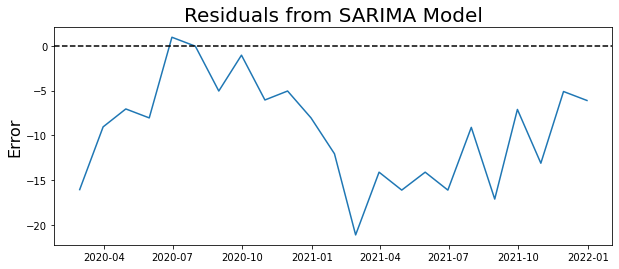

In [206]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [207]:
residuals.mean()

-9.386361327054056

In [208]:
predictions

date
2020-02-29    45.055480
2020-03-31    36.055480
2020-04-30    37.055480
2020-05-31    38.055480
2020-06-30    36.055480
2020-07-31    33.055480
2020-08-31    37.055480
2020-09-30    33.055480
2020-10-31    51.055480
2020-11-30    51.055480
2020-12-31    53.055480
2021-01-31    38.055480
2021-02-28    48.110959
2021-03-31    39.110959
2021-04-30    40.110959
2021-05-31    41.110959
2021-06-30    39.110959
2021-07-31    36.110959
2021-08-31    40.110959
2021-09-30    36.110959
2021-10-31    54.110959
2021-11-30    54.110959
2021-12-31    56.110959
Freq: M, Name: predicted_mean, dtype: float64

Text(0.5, 0, 'Time')

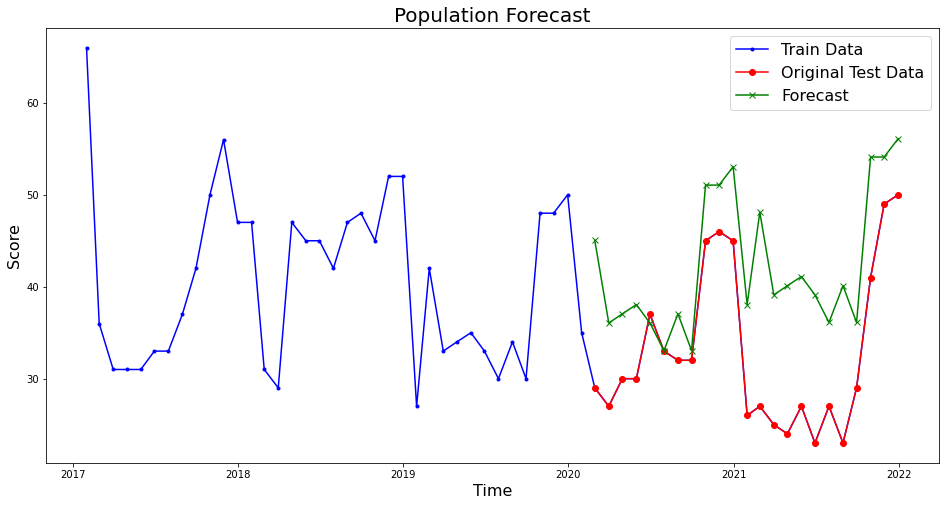

In [209]:
plt.figure(figsize=(16,8))

plt.plot(lim_data.Popu, "b.-")
plt.plot(test_data.Popu, "ro-")
plt.plot(predictions, "gx-")

plt.legend(('Train Data', 'Original Test Data', 'Forecast'), fontsize=16)

plt.title('Population Forecast', fontsize=20)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Time', fontsize=16)

#for year in range(start_date.year,end_date.year):
 #   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [210]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data.Popu)),3))

Mean Absolute Percent Error: 0.331


In [211]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 10.992547063559115


In [212]:
test_data.Popu

date
2020-02-29    29
2020-03-31    27
2020-04-30    30
2020-05-31    30
2020-06-30    37
2020-07-31    33
2020-08-31    32
2020-09-30    32
2020-10-31    45
2020-11-30    46
2020-12-31    45
2021-01-31    26
2021-02-28    27
2021-03-31    25
2021-04-30    24
2021-05-31    27
2021-06-30    23
2021-07-31    27
2021-08-31    23
2021-09-30    29
2021-10-31    41
2021-11-30    49
2021-12-31    50
Freq: M, Name: Popu, dtype: int64

In [213]:
predictions

date
2020-02-29    45.055480
2020-03-31    36.055480
2020-04-30    37.055480
2020-05-31    38.055480
2020-06-30    36.055480
2020-07-31    33.055480
2020-08-31    37.055480
2020-09-30    33.055480
2020-10-31    51.055480
2020-11-30    51.055480
2020-12-31    53.055480
2021-01-31    38.055480
2021-02-28    48.110959
2021-03-31    39.110959
2021-04-30    40.110959
2021-05-31    41.110959
2021-06-30    39.110959
2021-07-31    36.110959
2021-08-31    40.110959
2021-09-30    36.110959
2021-10-31    54.110959
2021-11-30    54.110959
2021-12-31    56.110959
Freq: M, Name: predicted_mean, dtype: float64

In [214]:
print(test_data.index)
train_data.shape

DatetimeIndex(['2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', name='date', freq='M')


(37, 5)

In [215]:
rolling_predictions = []

for train_end in test_data.index:
    #print(train_end-timedelta(days=1))
    train_data1 = lim_data.Popu[:train_end-timedelta(days=1)]
    #print(len(train_data1))
    model = SARIMAX(train_data1, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions.append(pred[0])
    
rolling_predictions = pd.Series(rolling_predictions, index=test_data.index)
rolling_predictions

date
2020-02-29    45.055480
2020-03-31    27.883162
2020-04-30    28.471536
2020-05-31    30.182167
2020-06-30    28.099328
2020-07-31    29.147791
2020-08-31    35.017274
2020-09-30    29.583987
2020-10-31    48.689604
2020-11-30    47.014160
2020-12-31    48.557253
2021-01-31    31.942544
2021-02-28    23.148472
2021-03-31    22.952022
2021-04-30    26.871116
2021-05-31    25.589407
2021-06-30    33.217485
2021-07-31    24.695192
2021-08-31    24.752485
2021-09-30    23.988112
2021-10-31    39.137101
2021-11-30    40.934378
2021-12-31    43.503406
Freq: M, dtype: float64

In [216]:
rolling_residuals = test_data.Popu - rolling_predictions
rolling_residuals

date
2020-02-29   -16.055480
2020-03-31    -0.883162
2020-04-30     1.528464
2020-05-31    -0.182167
2020-06-30     8.900672
2020-07-31     3.852209
2020-08-31    -3.017274
2020-09-30     2.416013
2020-10-31    -3.689604
2020-11-30    -1.014160
2020-12-31    -3.557253
2021-01-31    -5.942544
2021-02-28     3.851528
2021-03-31     2.047978
2021-04-30    -2.871116
2021-05-31     1.410593
2021-06-30   -10.217485
2021-07-31     2.304808
2021-08-31    -1.752485
2021-09-30     5.011888
2021-10-31     1.862899
2021-11-30     8.065622
2021-12-31     6.496594
Freq: M, dtype: float64

Text(0, 0.5, 'Error')

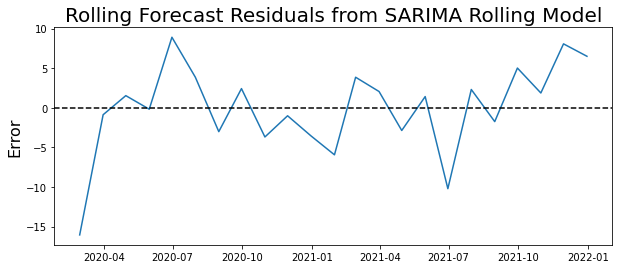

In [217]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Rolling Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [218]:
rolling_residuals.mean()

-0.06232433835668686

Text(0.5, 0, 'Time')

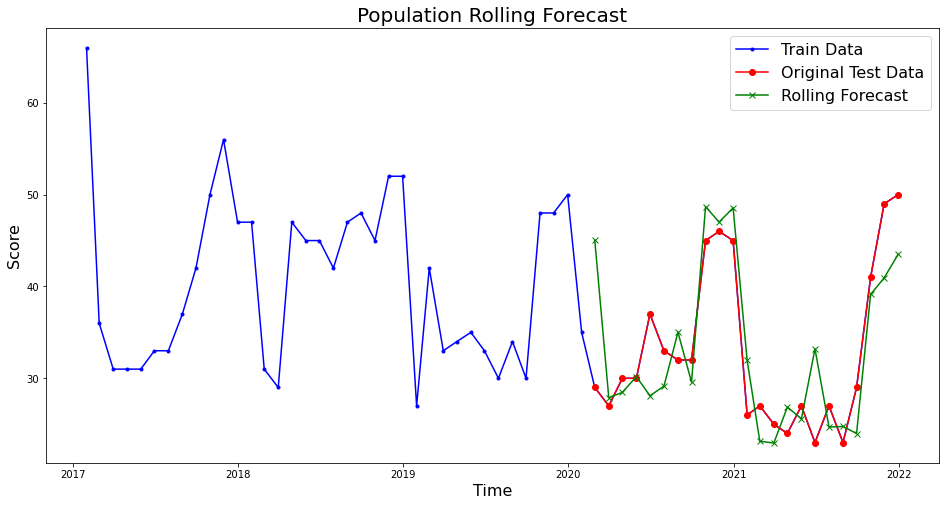

In [219]:
   
plt.figure(figsize=(16,8))

plt.plot(lim_data.Popu, "b.-")
plt.plot(test_data.Popu, "ro-")
plt.plot(rolling_predictions, "gx-")

plt.legend(('Train Data', 'Original Test Data', 'Rolling Forecast'), fontsize=16)

plt.title('Population Rolling Forecast', fontsize=20)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Time', fontsize=16)

In [220]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data.Popu)),2))

Mean Absolute Percent Error: 0.13


In [221]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 5.557725561841667
